In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
from scipy.special import erf 
import math as mt

In [22]:
x,y,err = np.loadtxt('Example_chi2.txt', delimiter=';')

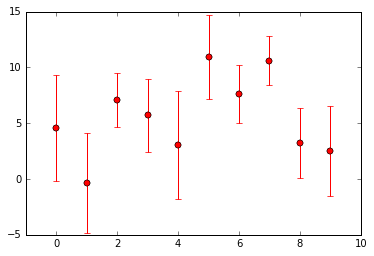

In [107]:
plt.errorbar(x,y,err,fmt='o',color='r')
plt.errorbar(x,y,err,fmt='o',color='r')
plt.xlim(-1,10)
plt.show()

In [76]:
arr_a = np.linspace(-1,5,61)
arr_b = np.linspace(-1,5,61)
arr_c = np.linspace(-1,5,61)
arr3D = np.zeros((61,61,61))

for indexA in range(0,len(arr_a)):
    for indexB in range(0,len(arr_b)):
        for indexC in range(0,len(arr_c)):
            ymod = arr_a[indexA] * np.power(x,2) + arr_b[indexB] * x + arr_c[indexC]
            arr3D[indexA,indexB,indexC] = np.sum(np.power(ymod - y,2)/np.power(err,2))

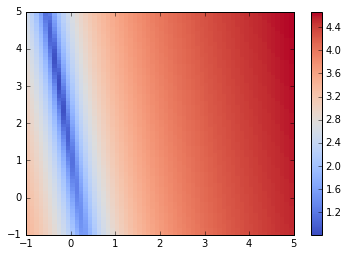

In [100]:
tmin = np.unravel_index(arr3D.argmin(),arr3D.shape)

plt.pcolormesh(arr_a, arr_b, np.transpose(np.log10(arr3D[:,:,tmin[2]])),cmap='coolwarm')

plt.colorbar()

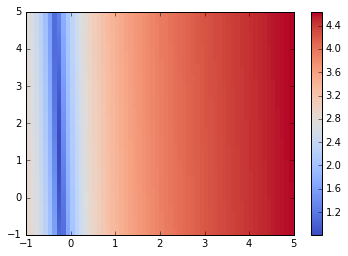

In [97]:
plt.pcolormesh(arr_a, arr_b, np.transpose(np.log10(arr3D[:,tmin[1],:])),cmap='coolwarm')
plt.colorbar()

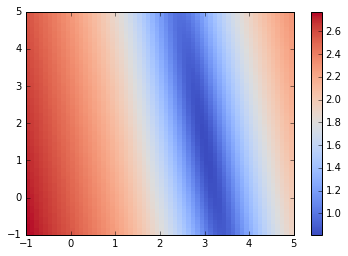

In [132]:
plt.pcolormesh(arr_a, arr_b, np.transpose(np.log10(arr3D[tmin[0],:,:])),cmap='coolwarm')
plt.colorbar()

In [109]:
arr_a[tmin[0]],arr_b[tmin[1]],arr_c[tmin[2]]

(-0.29999999999999993, 3.0, 1.2000000000000002)

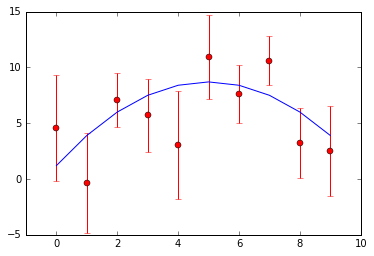

In [113]:
plt.errorbar(x,y,err,fmt='o',color='r')
plt.plot(x,arr_a[tmin[0]] * np.power(x,2) + arr_b[tmin[1]] * x + arr_c[tmin[2]],color='b')
plt.xlim(-1,10)
plt.show()

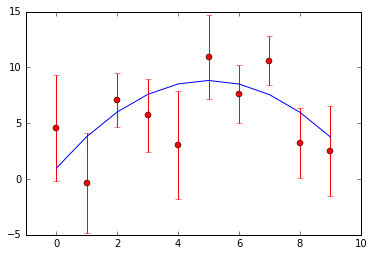

In [143]:
a, b, c  = np.polyfit(x, y, 2,  w=1/err)
plt.errorbar(x,y,err,fmt='o',color='r')
plt.xlim(-1,10)
plt.plot(x, a*np.power(x,2) + b*x + c, '-')

In [ ]:
a = -0.3 b=2.6 c=4

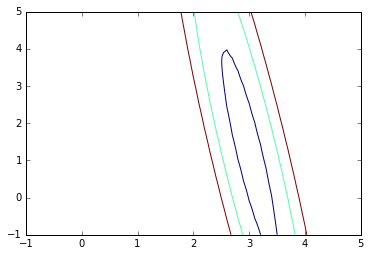

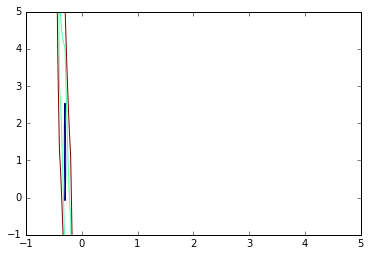

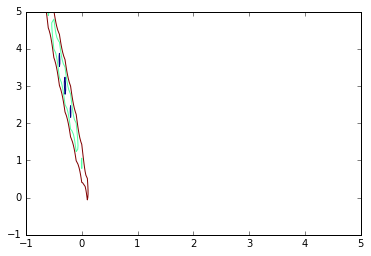

In [137]:
levels=[8.18,14.35,21.8]
plt.contour(arr_a, arr_b, np.transpose(arr3D[tmin[0],:,:]),levels)
plt.show()
plt.contour(arr_a, arr_b, np.transpose(arr3D[:,tmin[1],:]),levels)
plt.show()
plt.contour(arr_a, arr_b, np.transpose(arr3D[:,:,tmin[2]]),levels)
plt.show()